<a href="https://colab.research.google.com/github/Chandani-Sharma/Unsupervised/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual (Chandani Kumari)
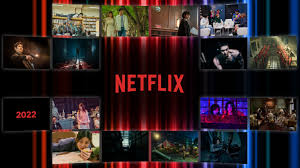

# **Project Summary -**

- This project revolves around performing unsupervised clustering on a dataset of Netflix movies and TV shows. The dataset comprises information about each title, including the show ID, type (movie or TV show), title, director, cast, country of production, date added on Netflix, release year, rating, duration, genre, and description.

- The business context of this project stems from the observation that Netflix has experienced a significant increase in the number of TV shows available since 2010, while the number of movies has declined by over 2,000 titles during the same period. This trend sparks curiosity about what other insights can be derived from the dataset.

**The project encompasses the following main objectives:**

- Exploratory Data Analysis: Conduct a thorough exploration of the dataset to gain valuable insights into its contents. By examining various features, distributions, and relationships within the data, a comprehensive understanding of Netflix's content landscape can be obtained.

- Understanding Content Availability Across Countries: Analyze the dataset to determine the types of content available in different countries. By examining the distribution of movies and TV shows across various regions, patterns and variations in content preferences can be uncovered.

- Evaluating Netflix's Focus on TV Shows: Investigate whether Netflix has been increasingly prioritizing TV shows over movies in recent years. This analysis involves examining the release years and comparing the number of TV shows to movies, enabling the identification of potential shifts in Netflix's content strategy.

- Clustering Similar Content: Utilize text-based features such as titles, directors, cast, and descriptions to perform clustering analysis. By grouping similar movies and TV shows together, common themes, genres, or content categories within Netflix's collection can be identified.

- By leveraging the dataset and conducting exploratory data analysis, country-based analysis, trend evaluation, and content clustering, this project aims to uncover valuable insights into Netflix's content landscape and their audience's preferences. The findings can potentially assist Netflix in refining content curation, enhancing recommendation systems, and making informed strategic decisions.

# **GitHub Link -**

https://github.com/Chandani-Sharma/Unsupervised/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb

# **Problem Statement**


- The problem is to cluster Netflix movies and TV shows based on their attributes and textual features. The dataset contains information like titles, directors, cast, countries, release years, ratings, durations, genres, and descriptions. 
- The objectives are to explore the dataset, analyze content availability across countries, assess Netflix's focus on TV shows versus movies, and cluster similar content using text-based features.
- By creating clusters, we can gain insights into the similarities and differences among the shows, enabling the delivery of personalized show recommendations tailored to individual preferences. 

Challenges:
- Exploratory Data Analysis: Analyzing a large dataset with multiple attributes and textual features to gain insights and identify patterns effectively.

- Content Availability by Country: Understanding the types of content available in different countries and detecting variations and preferences.

- Focus on TV Shows: Evaluating whether Netflix has shifted its focus towards TV shows and exploring trends in release years and the relative numbers of TV shows and movies.

- Clustering Similar Content: Developing a clustering approach to group similar movies and TV shows based on titles, directors, cast, and descriptions.

**Deliverables:**

- Exploratory Data Analysis report providing insights and patterns from the dataset.
- Analysis of content availability across countries, highlighting variations and preferences.
- Evaluation of Netflix's focus on TV shows versus movies, supported by statistical analysis.
- Clustering results and interpretation, showcasing groups of similar content based on text-based features.


 **Success Criteria:**

- Comprehensive exploratory data analysis, offering a clear understanding of Netflix's content landscape.
- Identification of variations in content availability across countries, aiding tailored offerings to different regions.
- Analysis confirming the focus shift towards TV shows and providing insights on the extent of the change.
- Effective clustering of similar content, demonstrating coherent groups with shared themes and genres.

# **EDA**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = df.copy() 

### Dataset First View

In [ ]:
#Dataset First View
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns =  df.shape
print(f'number of rows are {rows} and number of columns are {columns}')

number of rows are 7787 and number of columns are 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


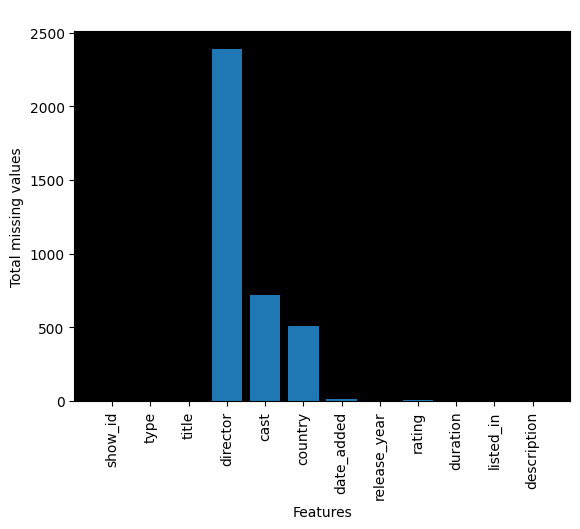

In [ ]:
# Visualizing the missing values
plt.bar(missing_values.index, missing_values.values, )
plt.title('number of missing values in the dataset')

# Set background color
plt.gca().set_facecolor('black')

#set the name of x and y axis
plt.xlabel('Features')
plt.ylabel('Total missing values')
plt.xticks(rotation = 90)
plt.show()

OBSERVATION

The number of missing values is highest for the "Director" attribute, followed by "Cast" and "Country". However, "Date Added" and "Rating" have relatively few missing values.


## **2. Understanding Your Variables**

### Descriptive Analysis

In [ ]:
df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

OBSERVATION

- The dataset reveals two primary types of content: **TV shows and movies**. Movies account for approximately 70% of the dataset, indicating a majority presence.
-  Additionally, content originating from the United States holds a significant share, representing approximately 28% of the dataset.

## 3. **Data Cleaning**

### Dealing with missing values

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

- The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
- 10 records with missing values in the date_added column can be dropped.
- The missing values in rating can be imputed with its mode, since this attribute is discrete.

### Typecasting 'date_added' from string to datetime:

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

### Typecasting 'duration' from string to integer

In [ ]:
# Splitting the duration column and changing the datatype to integer
df['duration'] = df['duration'].str.split().str[0].astype(int)

# Number of seasons for TV shows
tv_show_seasons = df.loc[df['type'] == 'TV Show', 'duration'].value_counts()

# Movie length in minutes
movie_lengths = df.loc[df['type'] == 'Movie', 'duration'].unique()

# Datatype of duration
duration_dtype = df['duration'].dtype


### Rating

In [ ]:
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', 'Unknown'],
      dtype=object)

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

- Adults: Typically, this category includes viewers who are 18 years old and above. It is intended for mature content suitable for adult audiences.

- Teens: This category generally targets viewers in their teenage years, typically ranging from 13 to 17 years old. The content within this category is often suitable for teenage audiences.

- Young Adults: This category caters to young adult viewers, typically in the age range of 18 to 24 years old. The content within this category is often tailored to the interests and experiences of young adults.

- Older Kids: This category typically includes viewers who are older children, usually ranging from 7 to 12 years old. The content within this category is generally suitable for children in this age group.

- Kids: This category is designed for younger viewers, usually up to the age of 6 or 7 years old. The content within this category is typically appropriate for preschool-age children.

**NOTE** - Age limits and content classifications can vary based on regional regulations and individual content ratings established by Netflix. The specific age ranges mentioned above are provided as general guidelines and may vary depending on the country or region.








### Country and Genre

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###Univatiate Analysis

#### Chart - 1

<Axes: xlabel='rating', ylabel='count'>

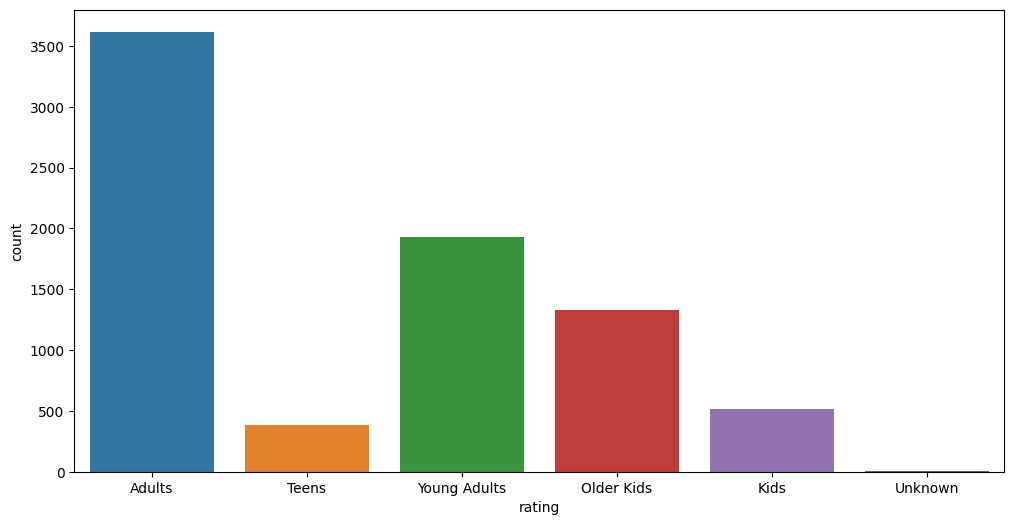

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(12,6))
sns.countplot(x='rating',data=df)

OBSERVATION

Approximately 50% of the shows on Netflix are tailored for adult audiences, making it the largest segment. Young adults, older kids, and kids are the subsequent target age groups with varying proportions of content. However, compared to other age categories, Netflix offers a relatively smaller number of shows explicitly created for teenagers.

#### Chart - 2

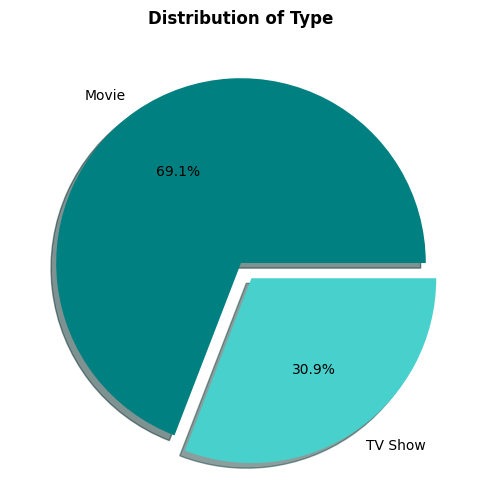

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(6,6))
plt.title('Distribution of Type',fontweight ="bold")
sex_counts = df['type'].value_counts()
labels = ['Movie', 'TV Show']
explode = [0, 0.1]
colors = ['teal', 'mediumturquoise']
plt.pie(sex_counts, labels=labels, explode = explode, colors=colors, shadow = True, autopct='%1.1f%%')
plt.show()

OBSERVATION


In the dataset, movies constitute the majority (69.1%) of the content, while TV shows account for a smaller portion (30.9%).

#### Chart - 3

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

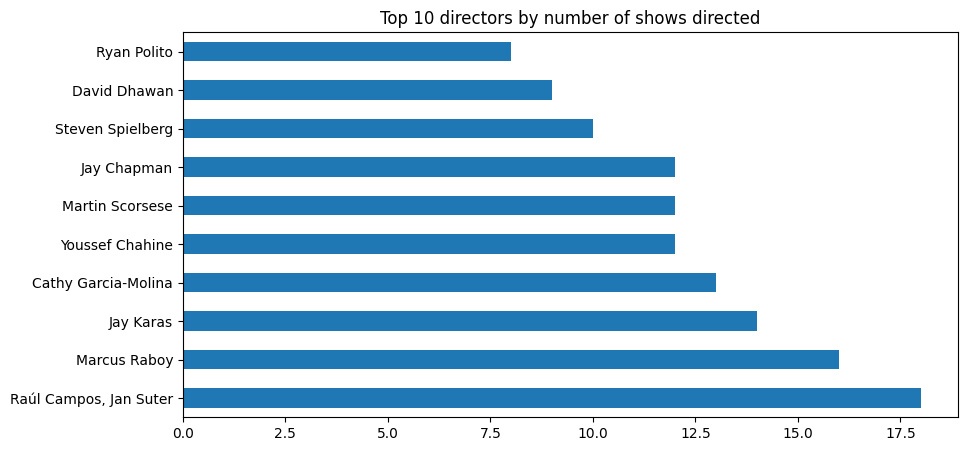

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')


OBSERVATION

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.


#### Chart - 4

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

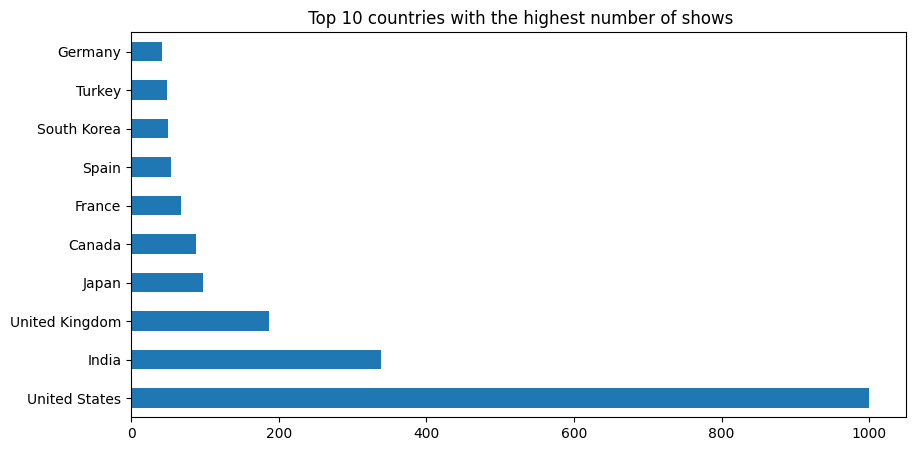

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

OBSERVATION

The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.26843657817109

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

77.94985250737463

- The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
- This value increases to about 78% for top ten countries.

#### Chart - 5

Text(0.5, 1.0, 'distribution by released year')

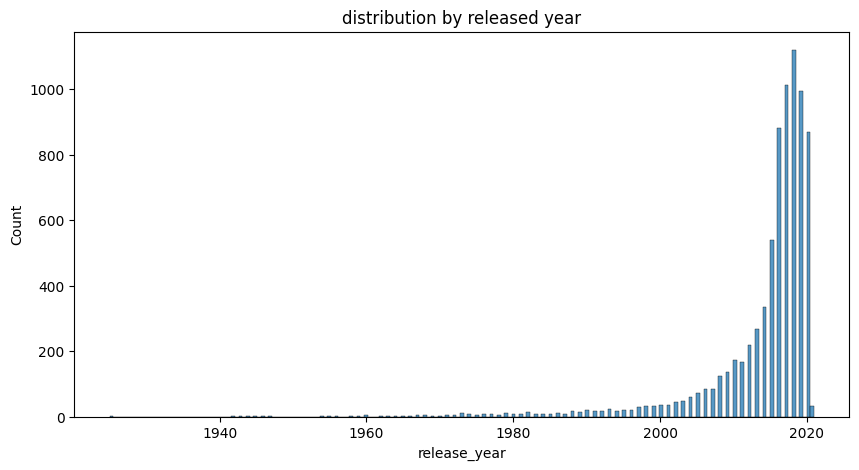

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

OBSERVATION

- Netflix showcases a larger quantity of new movies and TV shows compared to older content. 
- The total number of shows exhibits a noticeable upward trend, with a significant increase commencing around the year 2000. 
- The peak in the number of shows is observed in 2018, indicating a substantial surge in content production during that year.
-There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
-We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

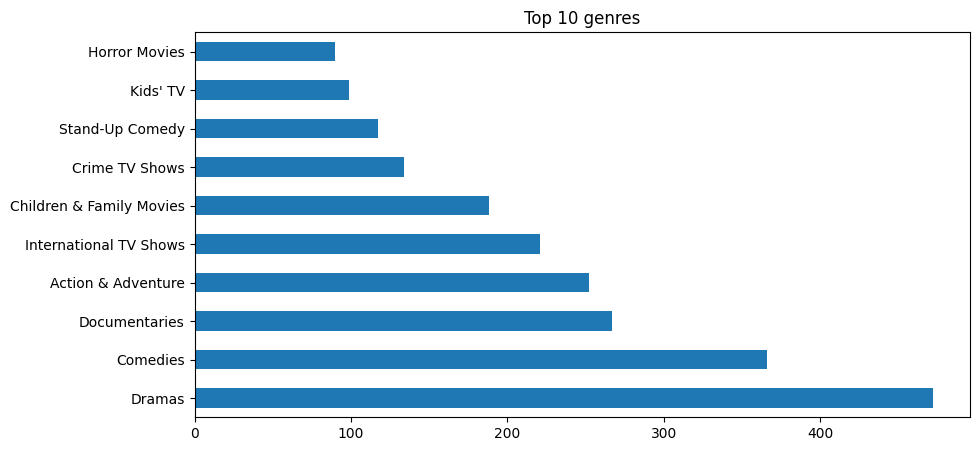

In [ ]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

40.7448377581121

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

81.34218289085545

OBSERVATION

- The dramas is the most popular genre followed by comedies and documentaries.
- These three genres account for about 41% of all movies and TV shows.
- This value increases to about 82% for top 10 genres.

#### Chart - 7

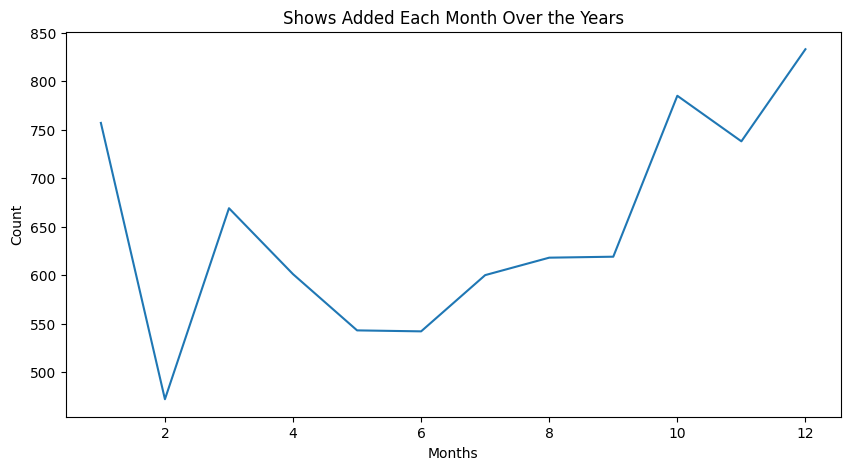

In [ ]:
#number of shows added on different months
plt.figure(figsize=(10, 5))
df['month_added'].value_counts().sort_index().plot(kind='line')
plt.title('Shows Added Each Month Over the Years')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()


OBSERVATION

Over the years a greater number of shows were added in the months of October, November, December, and January.

###Bivariate analysis

#### Chart - 8

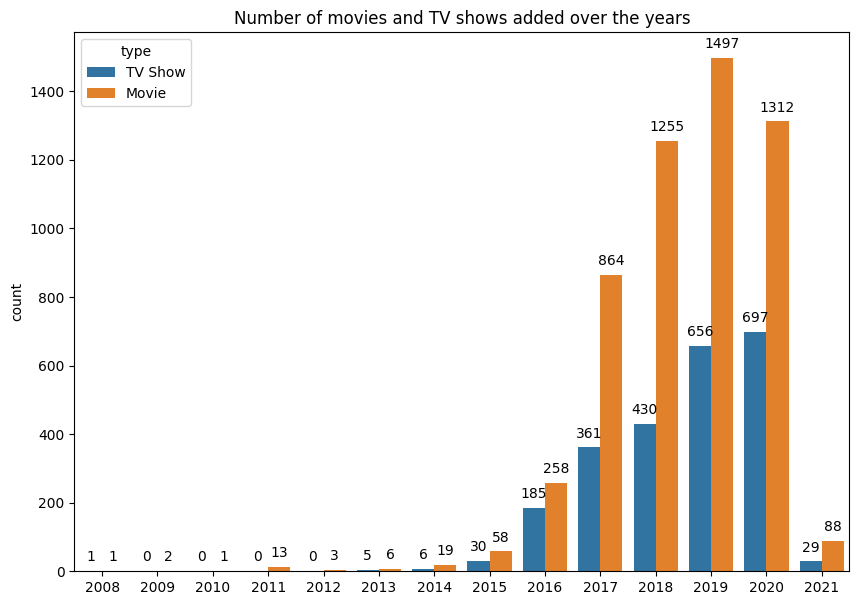

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,7))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

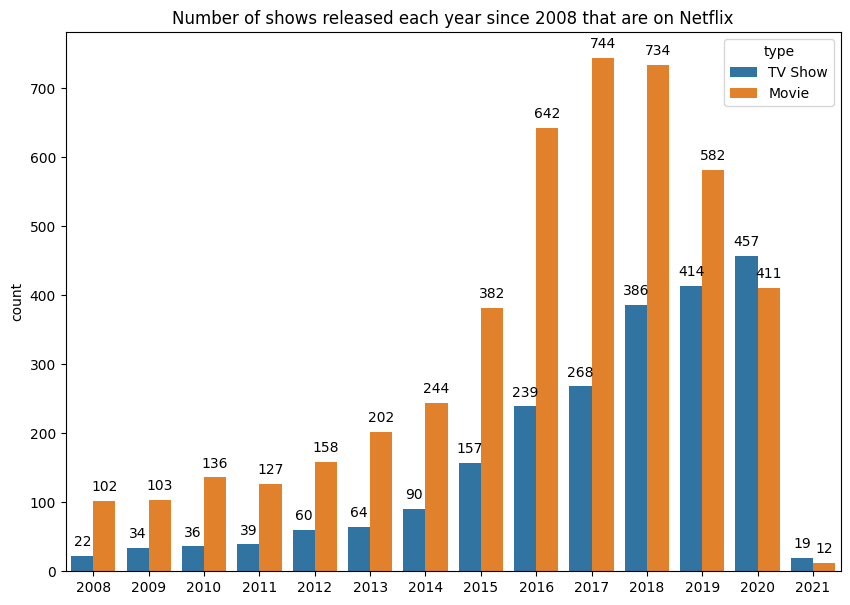

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,7))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

OBSERVATION

- Despite a decrease in the number of movies added in 2020, the trend is different for TV shows on Netflix.
- The count of TV shows has been consistently increasing, although the growth rate decreased in 2020, possibly due to production disruptions caused by the COVID-19 pandemic. 
- Prior to 2020, TV shows were always fewer in number compared to movies. However, starting from 2017, the gap between TV shows and movies began to narrow, and in 2020, the number of released TV shows surpassed that of movies. 
- This suggests that Netflix is focusing more on releasing TV shows on its platform while still adding movies to its content library.

#### Chart - 9

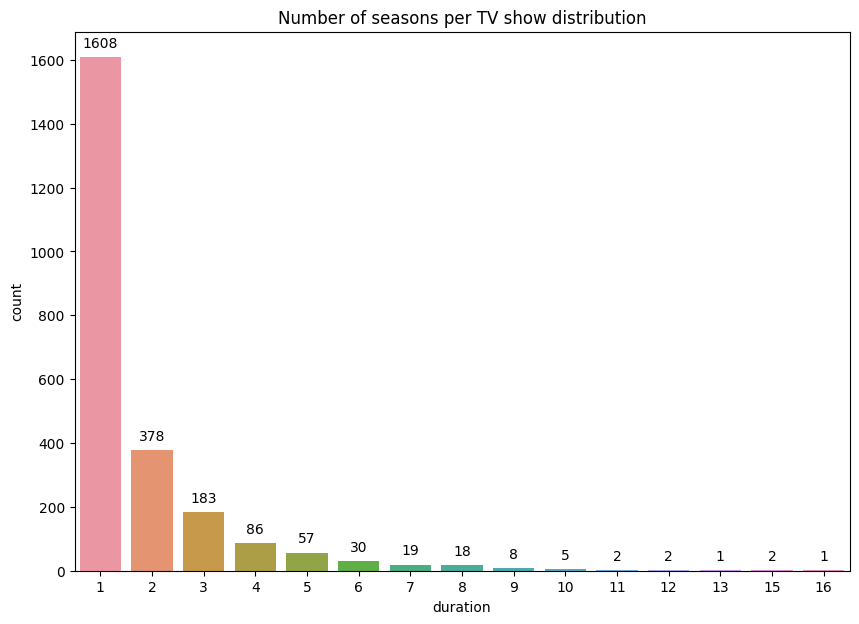

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,7))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

OBSERVATION

- The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. 
- This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
- There are very few TV shows that have more than 8 seasons.

#### Chart - 10

Text(0.5, 1.0, 'Movie duration distribution')

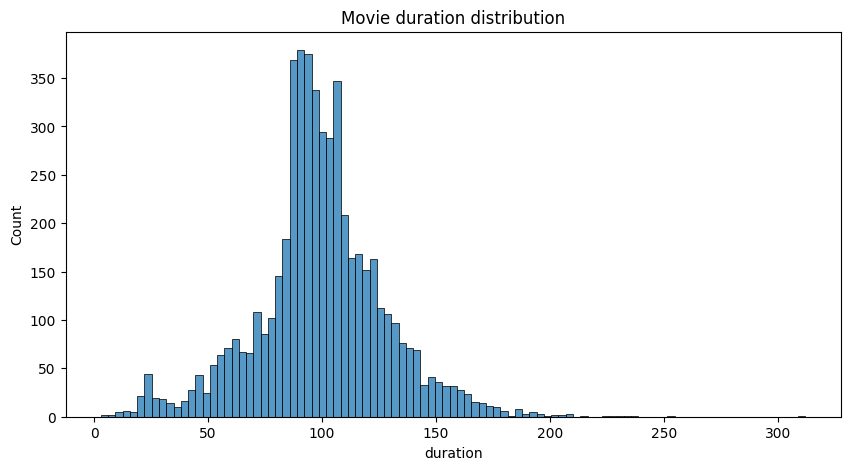

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

OBSERVATION

- The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.
- Based on these statistics, we can infer that the majority of the content on Netflix has a duration ranging from around 86 to 114 minutes, with an average duration of approximately 99 minutes.

#### Chart - 11

Text(0.5, 0, 'Year')

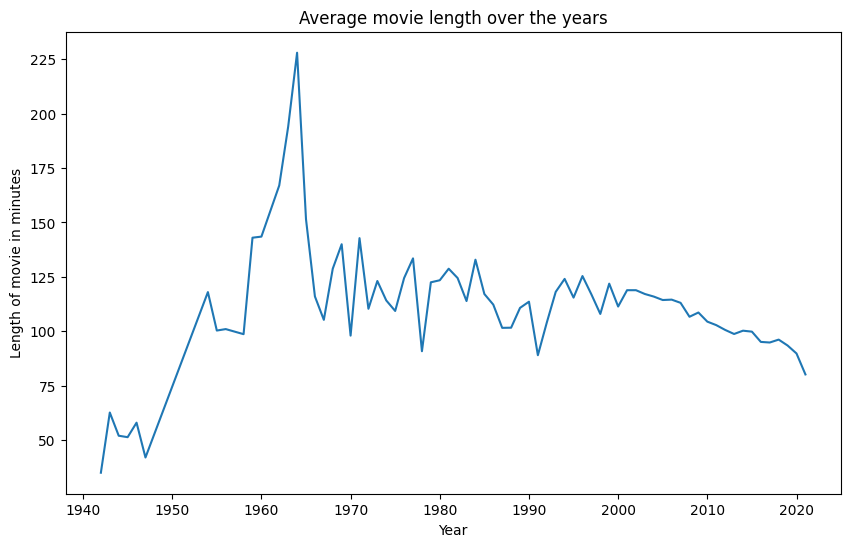

In [ ]:
# Average movie length over the years
plt.figure(figsize=(10,6))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [ ]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

OBSERVATION

- Netflix has several movies on its site, including those that were released in way back 1942.
- As per the plot, movies made in the 1940s had a fairly short duration on average.
- On average, movies made in the 1960s have the longest movie length.
The average length of a movie has been continuously decreasing since the 2000s.


#### Chart - 12

Text(0.5, 1.0, ' Top 10 Genres for TV Shows ')

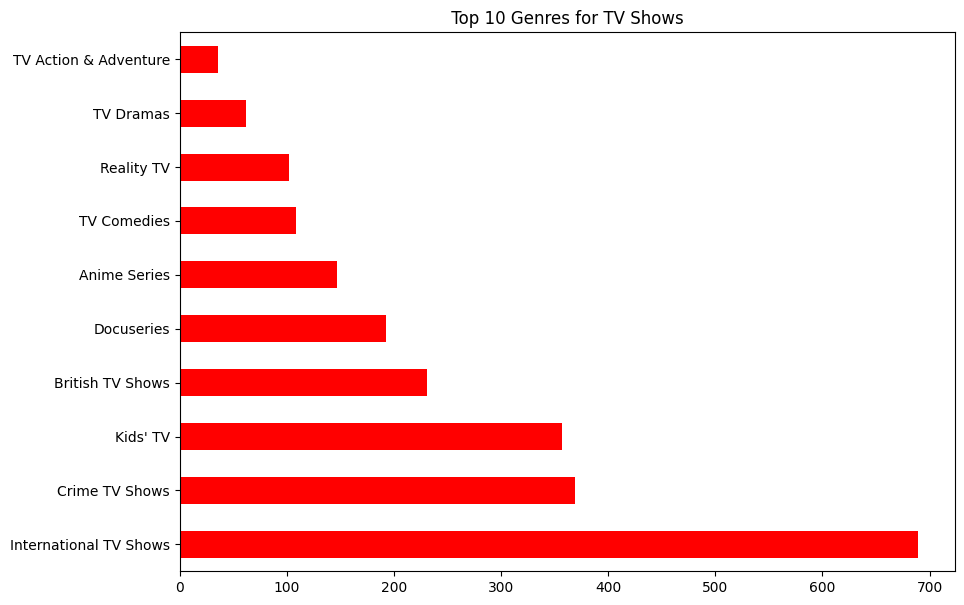

In [ ]:
# Top 10 genre for movies
plt.figure(figsize =(10,7))
df[df['type'] == 'TV Show' ].listed_in.value_counts().nlargest(10).plot(kind = 'barh', color = 'red')
plt.title(" Top 10 Genres for TV Shows ")

International, crime, and kids are the most popular genre for TV shows on Netflix.

#### Chart - 13

Text(0.5, 1.0, 'Top 10 TV show directors')

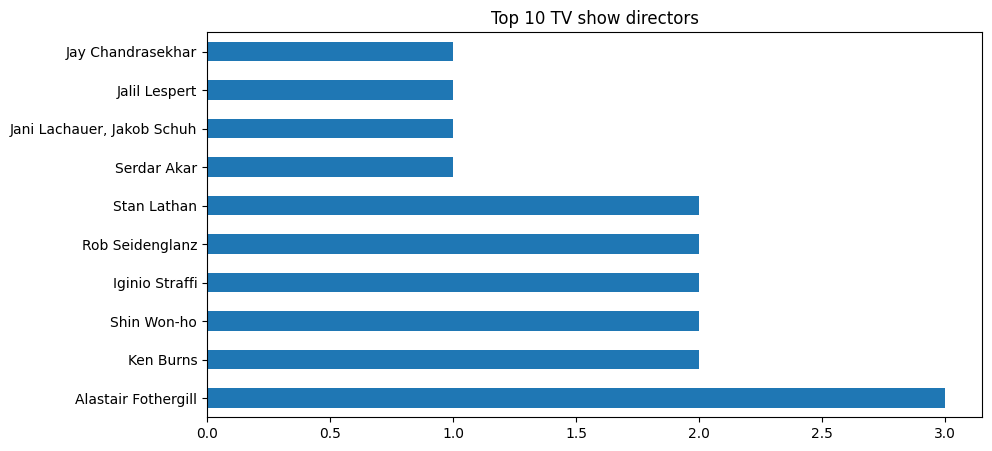

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

- Alastair Fothergill has directed three TV shows, the most of any director.
- Only six directors have directed more than one television show.

#### Chart - 14 

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

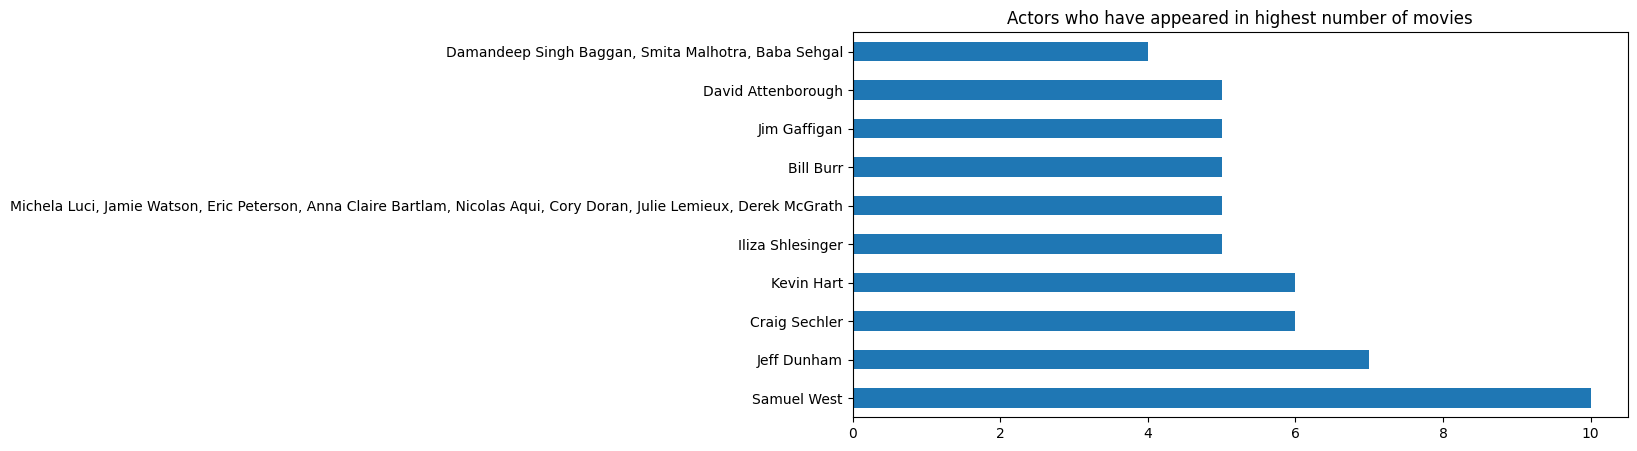

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

###Chart - 15

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

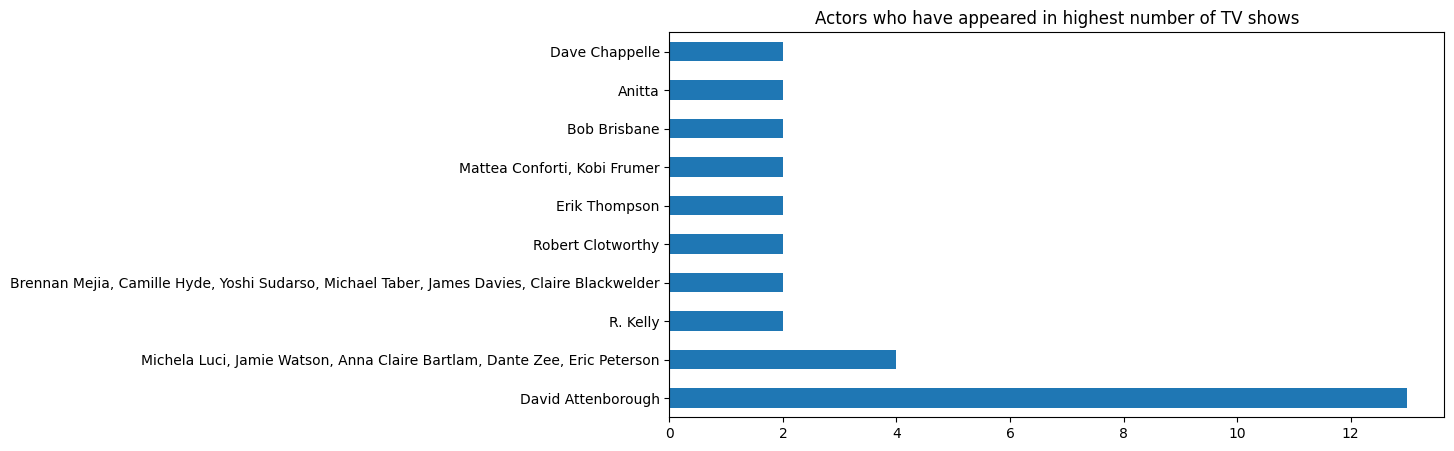

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

###Wordcloud

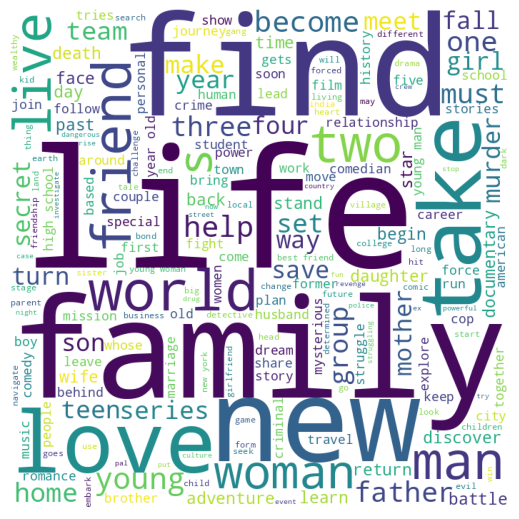

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Some keywords in Netflix show descriptions:** life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

# **Data preprocessing**


1. We will cluster the shows on Netflix based on the following attributes:

   a. Director

   b. Cast

   c. Country

   d. Listed in (genres)

   e. Description


2. Text preprocessing:

   a. Remove all non-ASCII characters.

   b. Remove stopwords and punctuation marks.

   c. Convert all textual data to lowercase.

   d. Apply spell correction to handle any misspelled words.

3. Lemmatization 

4. Tokenization:

   - Tokenize the preprocessed corpus into individual words or N-grams (contiguous sequences of N words).

5. Word vectorization:
   - Convert the tokenized corpus into numerical representations using techniques like CountVectorizer or TF-IDF.


6. Dimensionality reduction:
   - Apply dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the word vectors while preserving important information.

7. Clustering:
   - Use different clustering algorithms such as K-means, Hierarchical Clustering.


8. Optimal number of clusters:
    - Determine the optimal number of clusters using techniques like elbow method, silhouette analysis, or gap statistic.


9. Visualize the contents of each cluster:
   - Generate word clouds for each cluster to visually explore the prominent words within each cluster and gain insights into the clustered shows.

### Removing non-ASCII characters

In [ ]:
df.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

df['clustering_attributes'] = (df['director'] + ' ' + 
                                df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

In [ ]:
df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [ ]:
# function to remove non-ASCII characters
def remove_non_ascii(text):
    """Function to remove non-ASCII characters from text"""
    new_text = ''.join(char for char in text if ord(char) < 128)
    return new_text

In [ ]:
# remove non-ASCII characters from clustering attributes
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_non_ascii)

In [ ]:
df['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

###Remove stopwords and lower case

In [ ]:
# extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word not in sw ]
    return " ".join(text)

In [ ]:
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)

In [ ]:
df['clustering_attributes'][40]

'muharrem glmez erdem yener, ayhan ta, emin olcay, muharrem glmez, elif nur kerkk, tark papuuolu, suzan aksoy, doa konakolu, esin eden, deniz zerman turkey comedies, international movies the slacker owner public bath house rallies community save big developer comes town close open new mall.'

###Remove punctuations

In [ ]:
# function to remove punctuations
import string
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df['clustering_attributes'][40]

'muharrem glmez erdem yener ayhan ta emin olcay muharrem glmez elif nur kerkk tark papuuolu suzan aksoy doa konakolu esin eden deniz zerman turkey comedies international movies the slacker owner public bath house rallies community save big developer comes town close open new mall'

### Lemmatization

In [ ]:
# function to lemmatize the corpus
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Lemmatization
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])

In [ ]:
df['clustering_attributes'][40]

'muharrem glmez erdem yener ayhan ta emin olcay muharrem glmez elif nur kerkk tark papuuolu suzan aksoy doa konakolu esin eden deniz zerman turkey comedies international movies the slacker owner public bath house rallies community save big developer comes town close open new mall'

###Tokenization

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

###Vectorization

We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# clustering tokens saved in a variable
clustering_data = df['clustering_attributes']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenization
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=lambda x: x, stop_words='english', lowercase=False, max_features=20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235066 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(7787, 20000)

In [ ]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

###Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

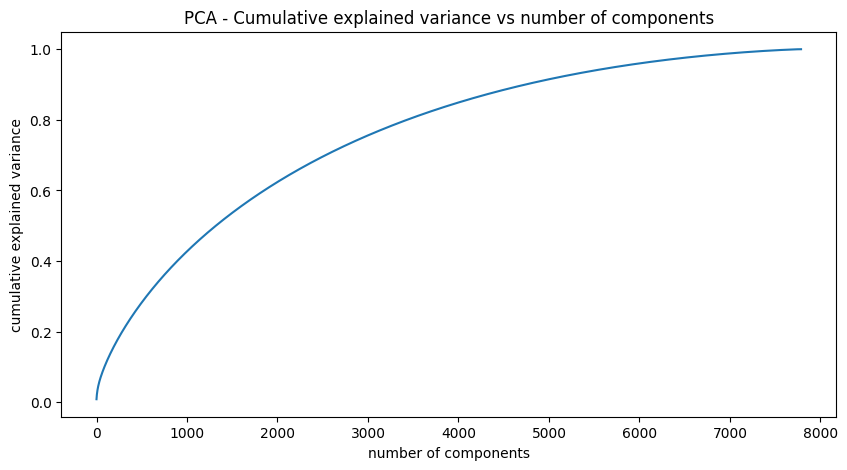

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

- Through our analysis, we have determined that approximately 7500 components are required to explain 100% of the variance. 
- However, we also discovered that more than 80% of the variance can be explained by just 4000 components.
- Therefore, in order to streamline the model and reduce dimensionality, we can confidently select the top 4000 components, which will still retain the ability to capture over 80% of the variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

# **ML Model Implementation**

##Clusters implementation

###K-Means Clustering

Text(0, 0.5, 'WCSS')

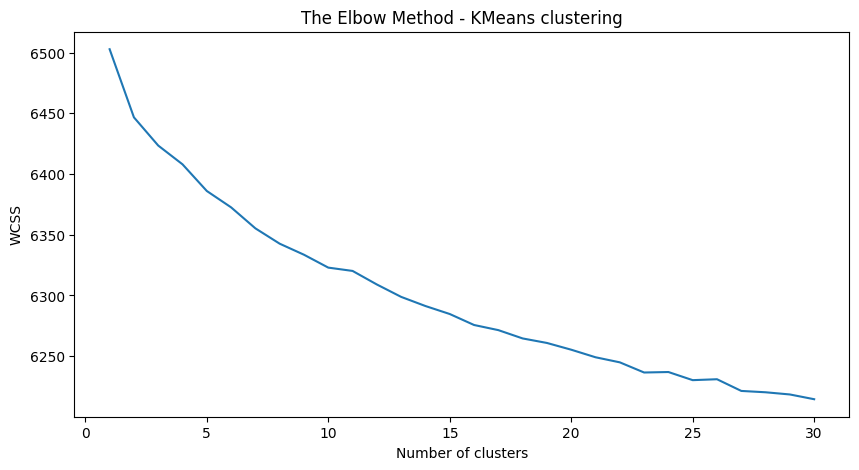

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

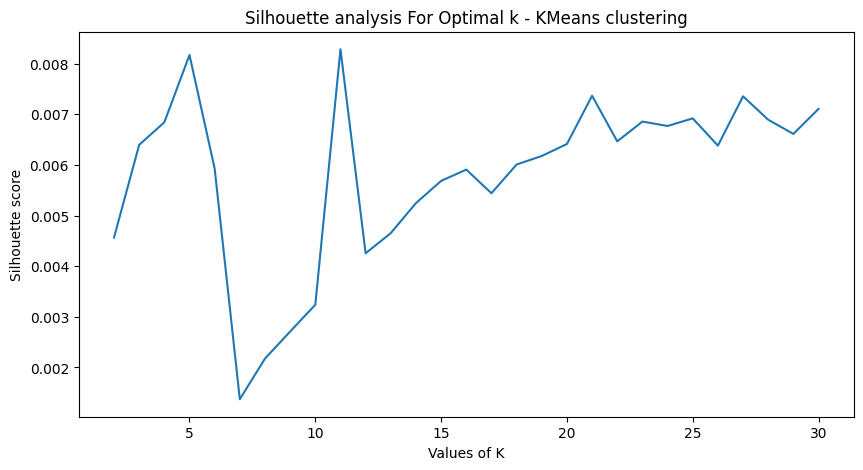

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6372.547368321684, 0.005929718981883021)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

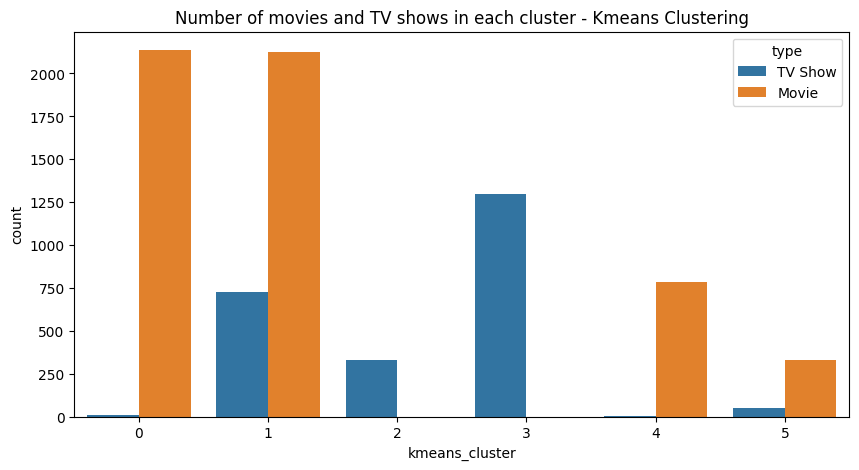

In [ ]:
## Number of movies and tv shows in each cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='kmeans_cluster', data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
plt.gca().annotate("",
xy=(0, 0), xycoords='data',
xytext=(0, 0), textcoords='data',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3"),
)
plt.show()

### Building wordclouds for different clusters built

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)

 # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

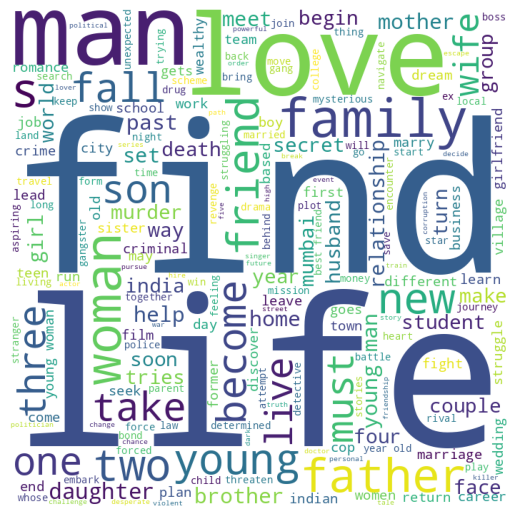

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter

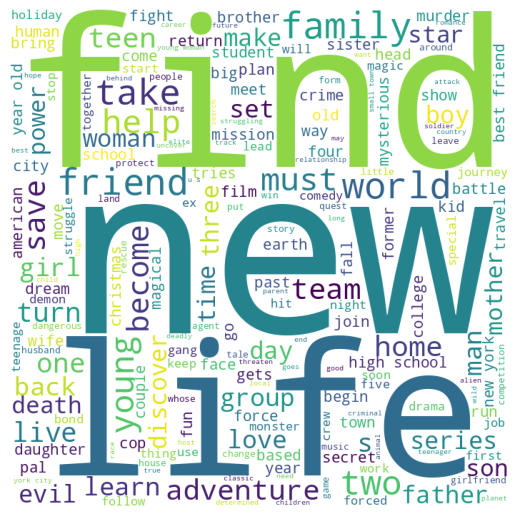

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

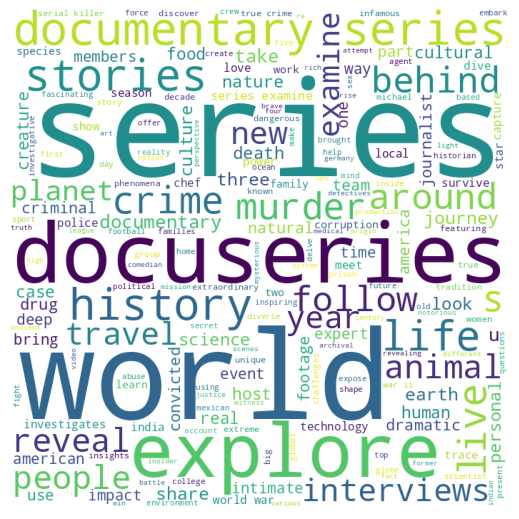

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

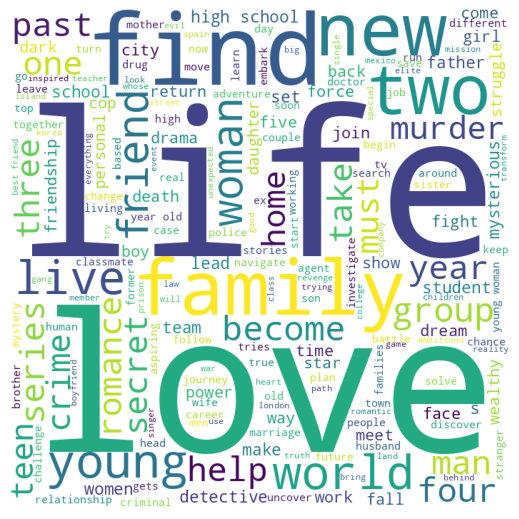

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

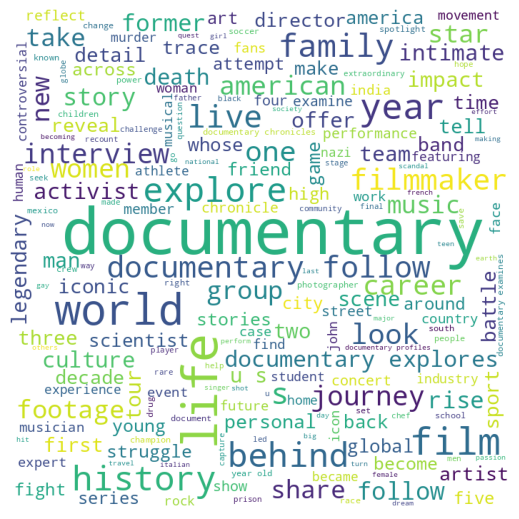

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

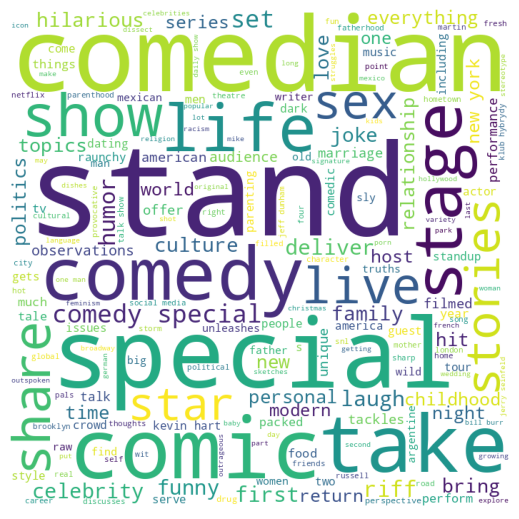

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

### Hierarchical clustering

- Building clusters using the agglomerative (hierarchical) clustering algorithm.

- Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm

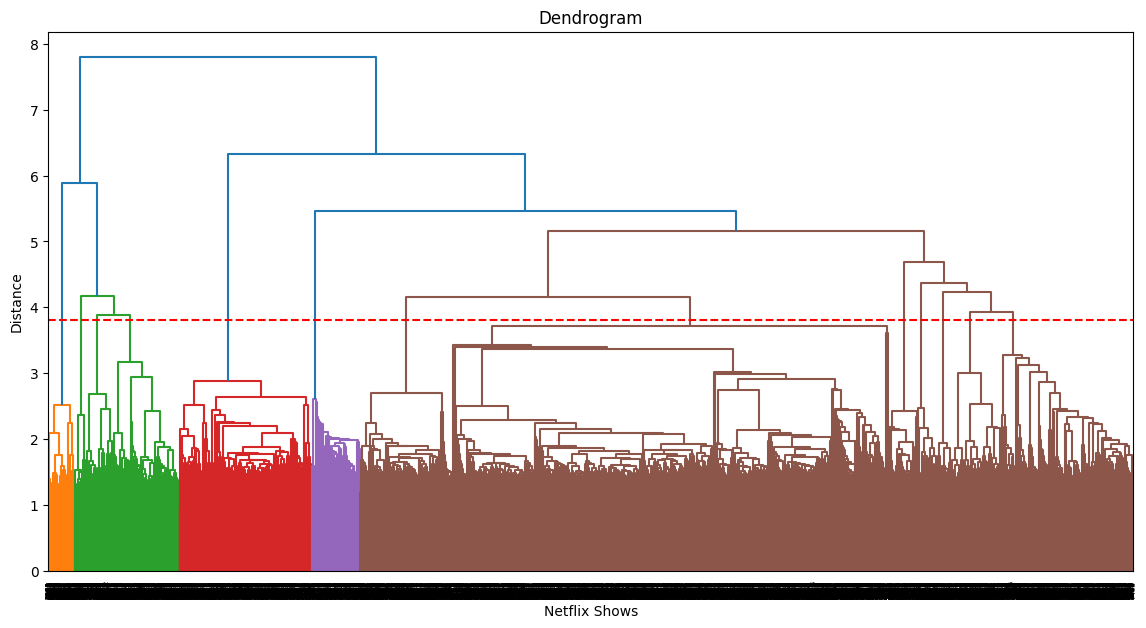

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(14, 7))  
dend = dendrogram(linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([2, 5, 0, ..., 4, 0, 4])

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

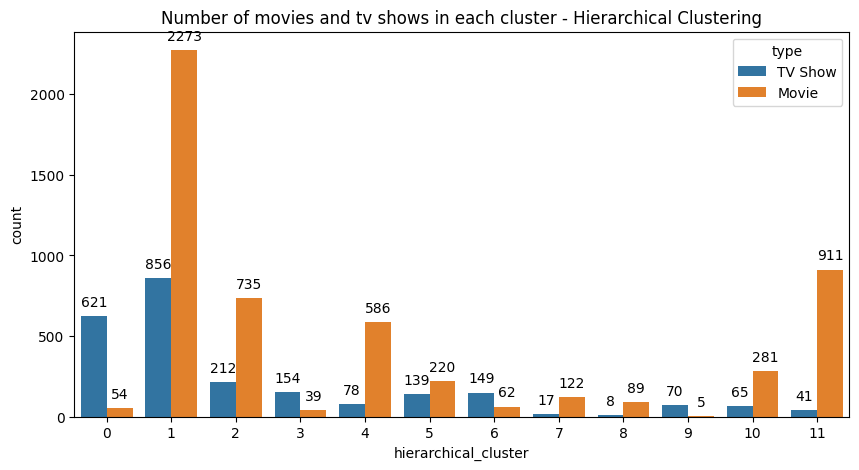

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

###Building wordclouds for different clusters built

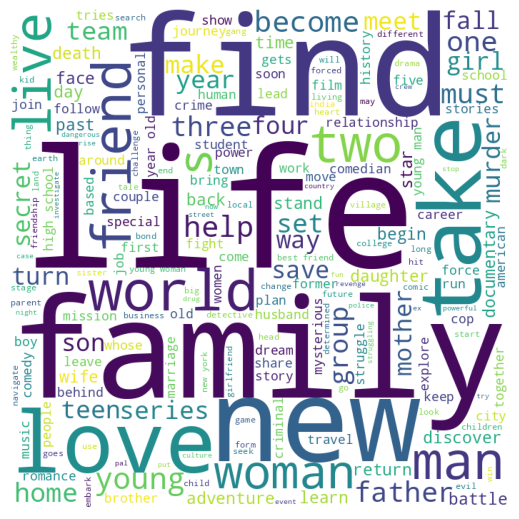

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

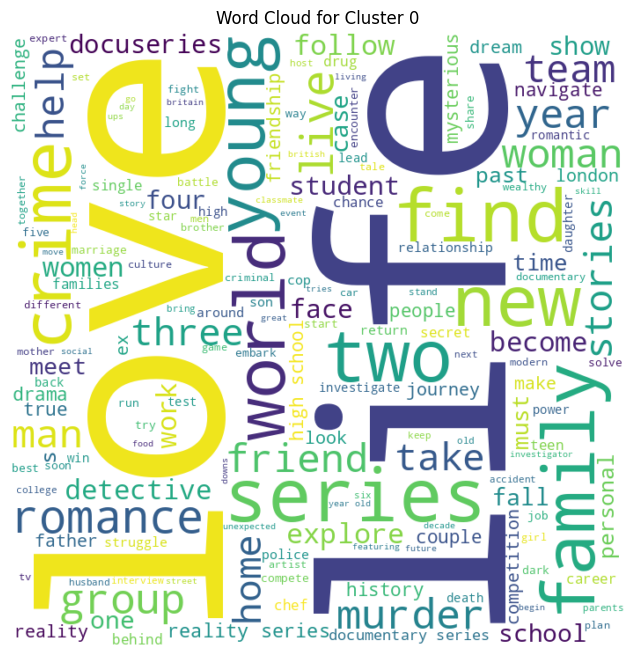

In [ ]:
# worldcloud for cluster 0
hierarchical_worldcloud(0)

Keywords observed in cluster 0: life, love, family, find, new, world, series, crime, young

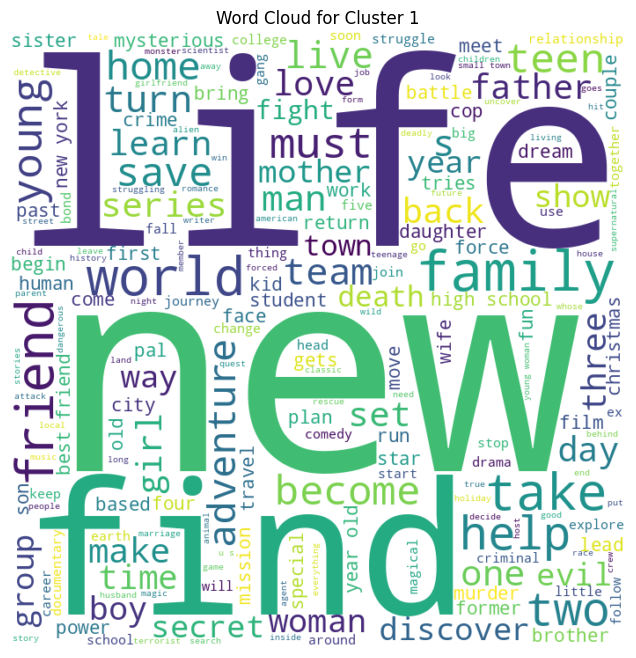

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

Keywords observed in cluster 2: life, new, find, friend, discover, yonng , family

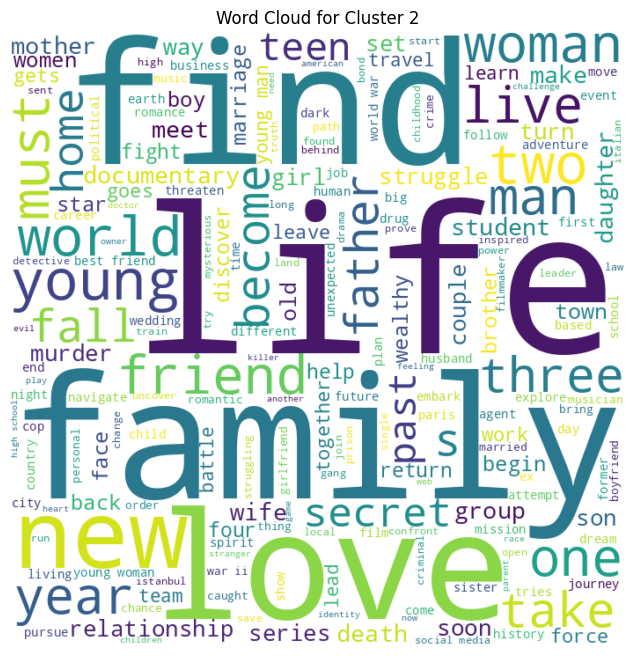

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

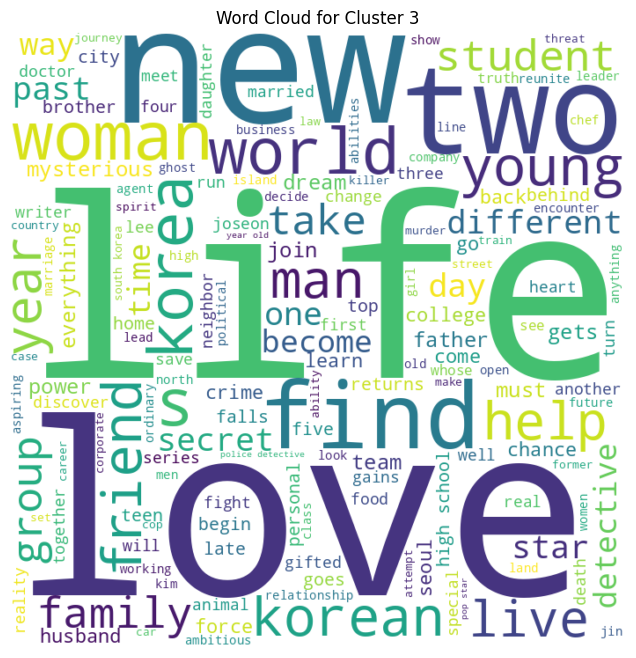

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

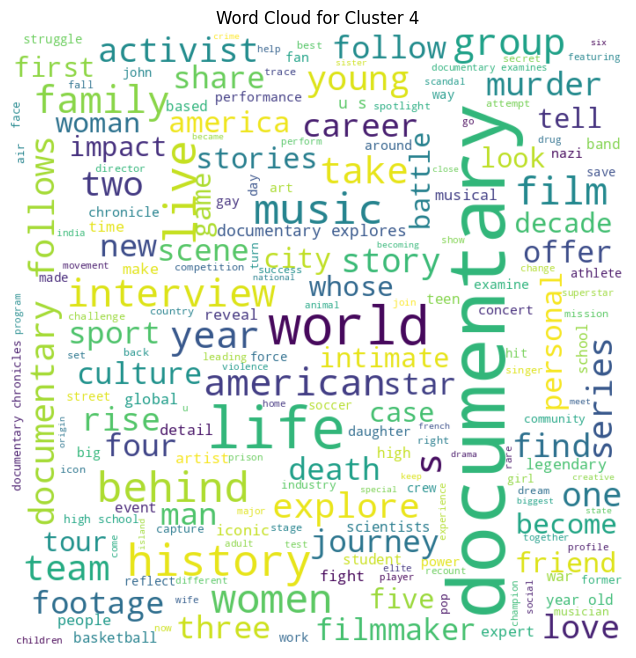

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

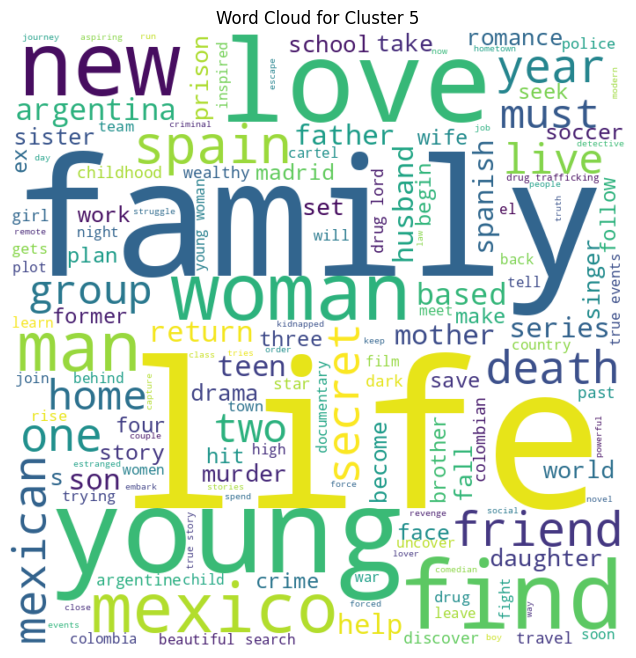

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

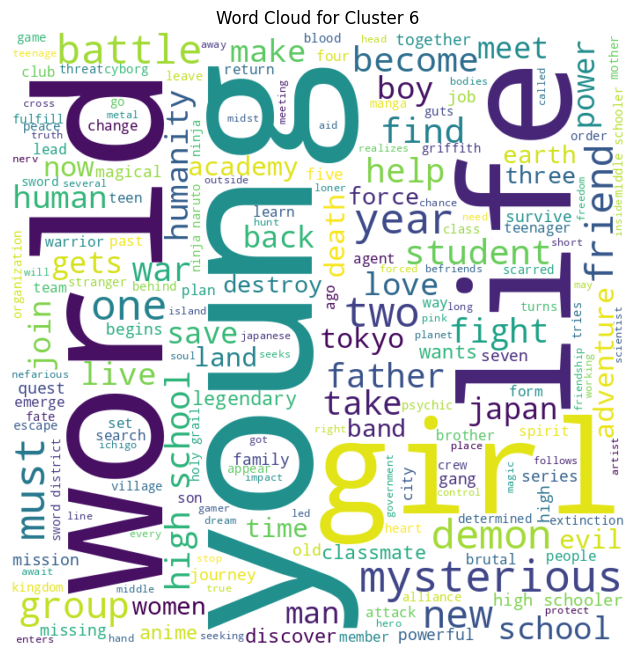

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

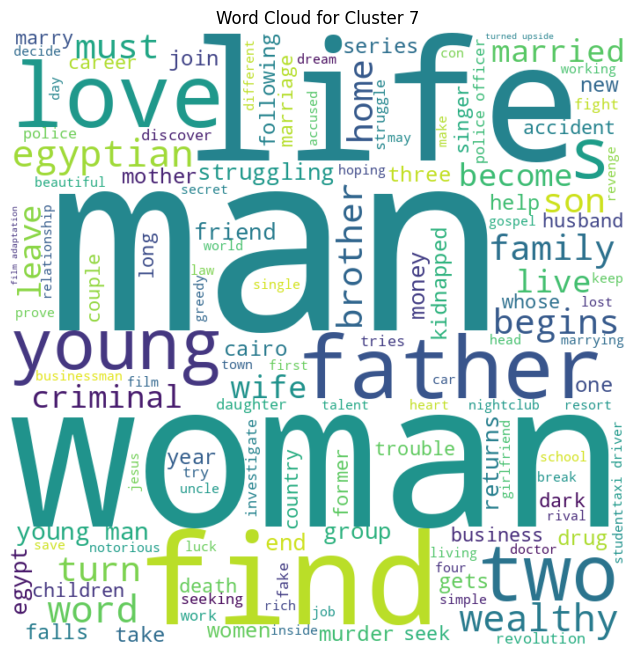

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

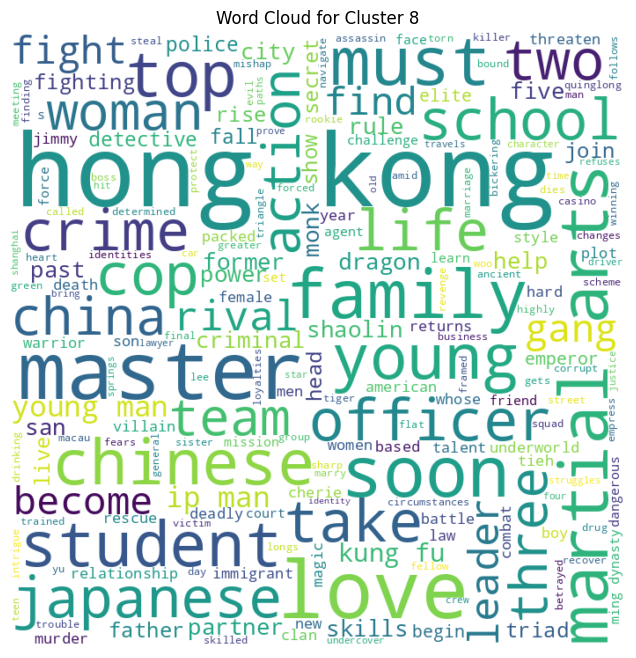

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

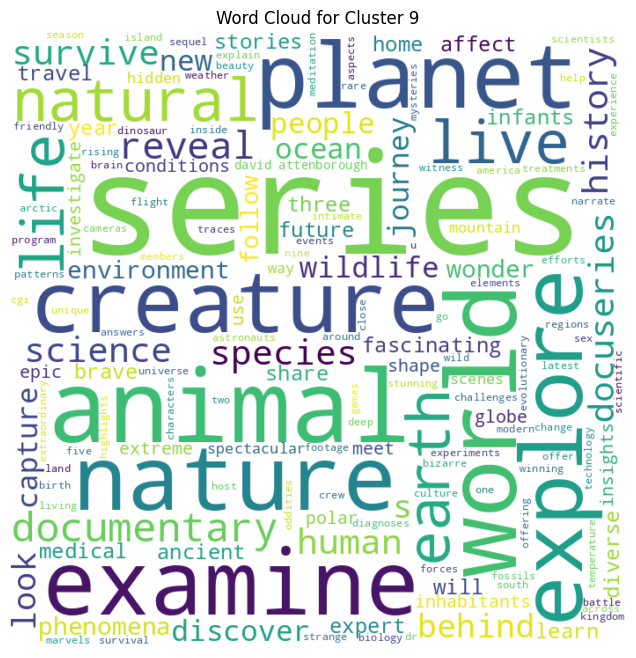

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

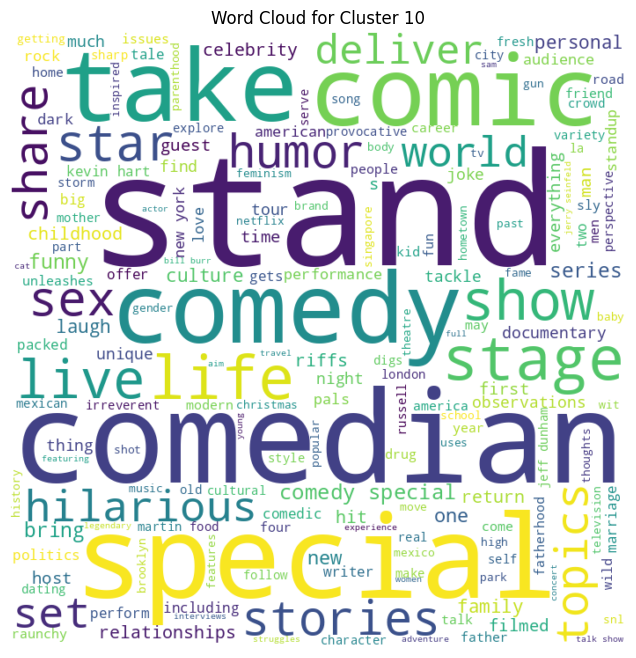

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

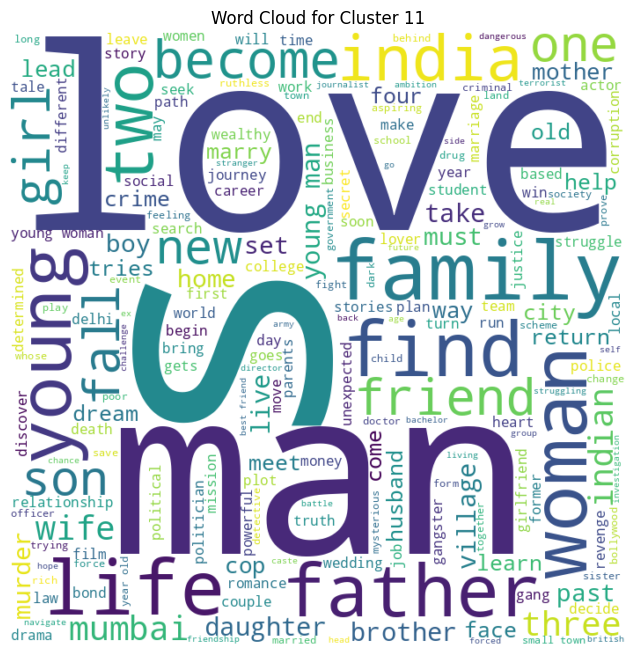

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

##Content based recommender system

- We can build a simple content based recommender system based on the similarity of the shows.
- If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
- To get the similarity score of the shows, we can use cosine similarity
- The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. 
- We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [ ]:
# defining a new df for building a recommender system
recommender_df = df.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(7787, 7787)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['Mr. Sunshine',
 'One Spring Night',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'Reply 1994',
 'Extracurricular',
 'My Secret Romance',
 'Chef & My Fridge']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Scream',
 'Warrior Nun',
 'The Sinner',
 'Kiss Me First',
 'Nightflyers',
 'Zombie Dumb']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'London Spy',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'Giri / Haji',
 'My Hotter Half',
 'Father Brown',
 'Inside The Freemasons']

In [ ]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

Invalid because the show 'XXX' is not available on Netflix.

# **Conclusion**

- In this project, we tackled a text clustering problem aimed at categorizing Netflix shows into distinct clusters based on their similarity. The dataset consisted of 7787 records with 11 attributes.

- To begin, we addressed missing values in the dataset and conducted exploratory data analysis (EDA). Our analysis revealed that Netflix primarily hosts movies and that the total number of shows added to the platform is growing exponentially. Additionally, a significant portion of the shows originated from the United States, and the majority of the content targeted adult and young adult audiences.

- We decided to cluster the data using attributes such as director, cast, country, genre, and description. These attributes were tokenized, preprocessed, and transformed into numerical features using TFIDF vectorization. This process resulted in a total of 20,000 attributes.

- To handle the curse of dimensionality, we employed Principal Component Analysis (PCA). Through analysis, we determined that 4,000 components were sufficient to capture over 80% of the variance, and therefore, we limited the number of components to 4,000.

- We employed the k-means clustering algorithm to build the initial clusters. Utilizing the elbow method and Silhouette score analysis, we determined that the optimal number of clusters was 6. 
- Subsequently, we constructed clusters using the Agglomerative clustering algorithm, and the optimal number of clusters was determined to be 12 based on dendrogram visualization.To provide recommendations to users based on their watched shows, we developed a content-based recommender system using a similarity matrix obtained through cosine similarity.
- The recommender system generates 10 recommendations by considering the type of show the user has watched.

- Overall, this project involved data preprocessing, dimensionality reduction, clustering using k-means and Agglomerative algorithms, and the development of a content-based recommender system.